# Exponentially Weighted Moving Average

Exponentially Weighted Moving Average (EWMA) is a statistical method used to calculate the average of a set of data points over time, while giving greater weight to more recent data points.

The calculation of the EWMA involves assigning a weight to each data point based on its position in time relative to the current period. The weights decrease exponentially as the data point gets farther away from the current period. The formula for calculating the EWMA is:

$$
\text{EWMA}(t) = \alpha Y(t) + (1 - \alpha) \text{EWMA}(t-1)
$$

Where:
- $\text{EWMA}(t)$ is the exponentially weighted moving average at time $t$
- $Y(t)$ is the value of the data point at time $t$
- $\alpha$ is the smoothing factor or the weighting factor. It ranges between 0 and 1, and it determines the extent to which recent data points are weighted more heavily than older data points.
- $\text{EWMA}(t-1)$ is the $\text{EWMA}$ value for the previous period.

The value of $\alpha$ is usually chosen based on the nature of the data being analyzed and the level of smoothing desired. A smaller value of α gives more weight to older data points, resulting in a smoother trend, while a larger value of α puts more emphasis on recent data points, making the trend more responsive to changes.

EWMA is a useful tool for analyzing trends and identifying patterns in data over time. It can be used to forecast future values based on the historical data and to detect changes in the underlying trend of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from bamboo_plots import process_ewmas
from bamboo_plots import corr_ewmas

### Example with Dataframe Resampled for 1 Minutes

In [2]:
path="/media/ege/DATA/bamboo/RESAMPS/vwaps/MeanResamp_1Min/20220418/SSE_600159.csv"
df1 = pd.read_csv(path, index_col='ts')
df1 = df1.drop('Unnamed: 0',axis=1)
df1['returns'] = df1['ltp'].pct_change() #calculate and add returns as a column
df1 = df1.dropna()
df1.head()

,ltp,trade_size,level_qty:ask:0,level_qty:bid:0,level_price:ask:0,vwap,returns
ts,,,,,,,
2022-04-18 01:31:00,3.478889,794.444444,23613.888889,24891.666667,3.485278,3.465713,0.004677
2022-04-18 01:32:00,3.493684,781.578947,27131.578947,32705.263158,3.501842,3.470049,0.004253
2022-04-18 01:33:00,3.513421,1389.473684,16060.526316,16273.684211,3.516316,3.479420,0.005649
2022-04-18 01:34:00,3.469444,1413.888889,35219.444444,33058.333333,3.475556,3.477622,-0.012517
2022-04-18 01:35:00,3.469211,5213.157895,64565.789474,32931.578947,3.475000,3.474264,-0.000067


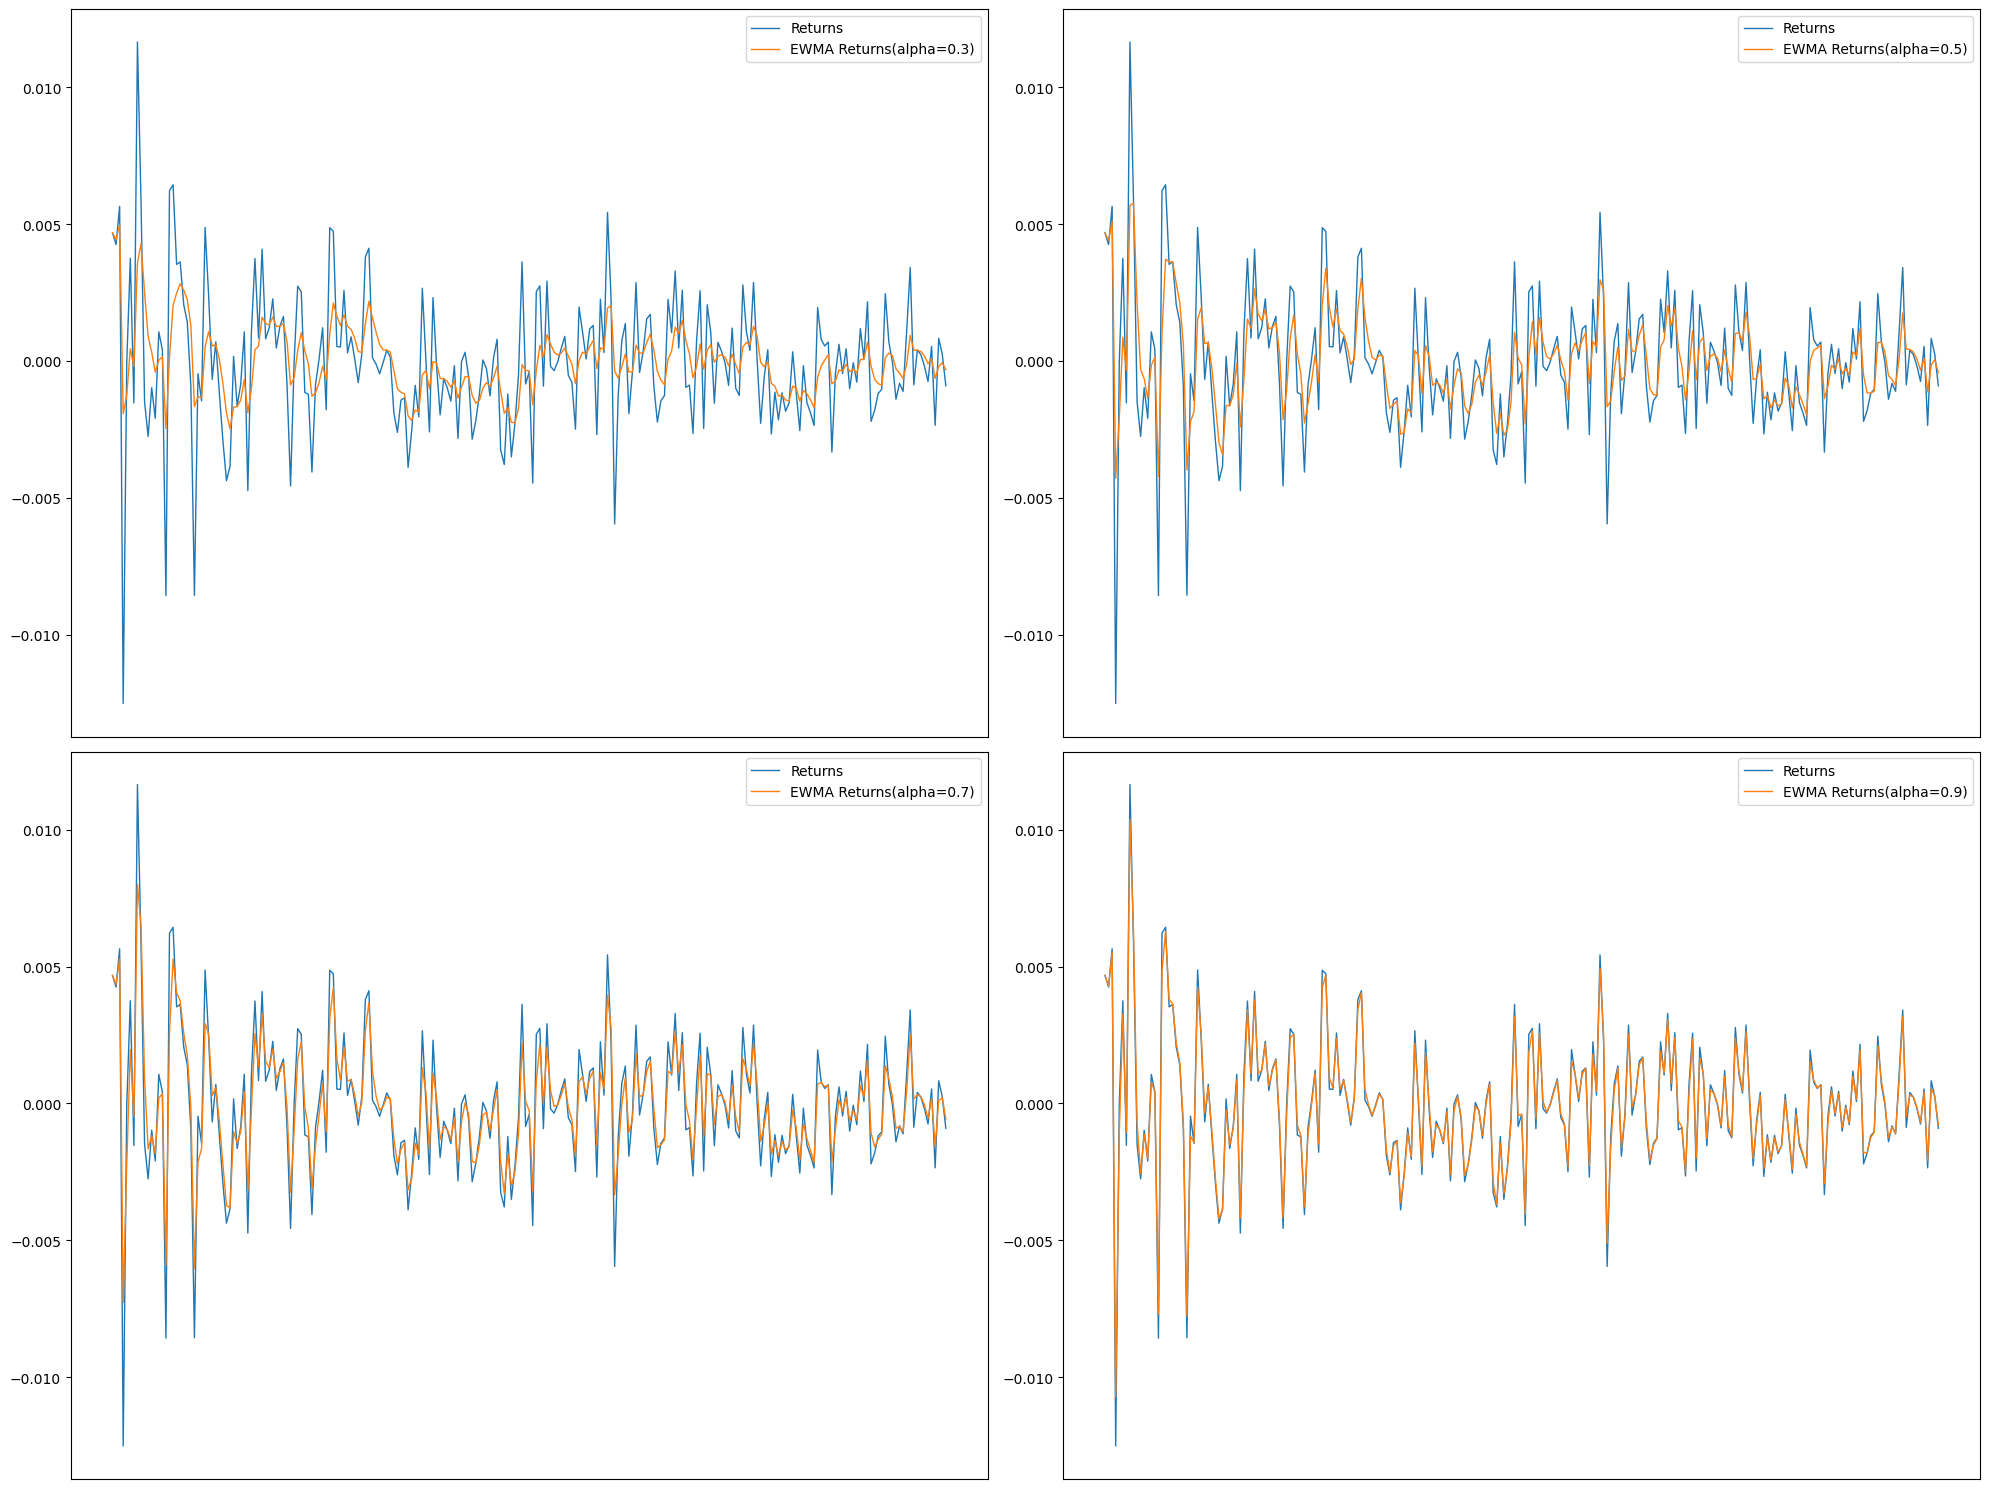

In [3]:
df1_ewmas= process_ewmas(df1,0.3,0.5,0.7,0.9)

#### Correlating Original Return Values with Exponentially Weighted Averages

In [107]:
df1_ewmas.head()

,original_returns,0.3,0.5,0.7,0.9
ts,,,,,
2022-04-22 01:31:00,0.001851,0.001851,0.001851,0.001851,0.001851
2022-04-22 01:32:00,-0.003218,-0.001131,-0.001529,-0.002049,-0.002758
2022-04-22 01:33:00,-0.004837,-0.002823,-0.003419,-0.004055,-0.004631
2022-04-22 01:34:00,0.009676,0.002111,0.003565,0.005635,0.008247
2022-04-22 01:35:00,0.002046,0.002088,0.002781,0.003117,0.002666


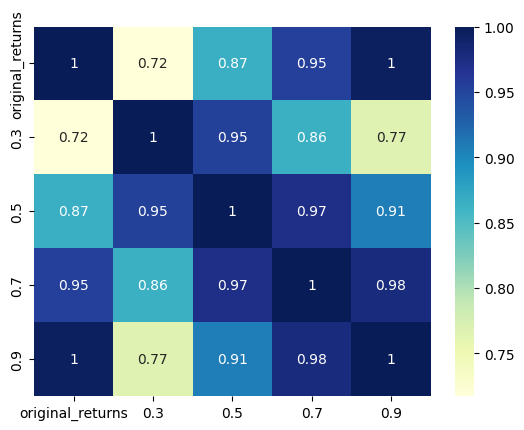

In [4]:
corr_ewmas(df1_ewmas)

### Example with Dataframe Resampled for 5 Minutes

In [138]:
path="/media/ege/DATA/bamboo-master/Resamp_5Min/vwaps/20220422/SSE_600159.csv"
df5 = pd.read_csv(path, index_col='ts')
df5 = df5.drop('Unnamed: 0',axis=1)
df5['returns'] = df5['ltp'].pct_change()
df5 = df5.dropna()
df5

,ltp,trade_size,level_qty:ask:0,level_qty:bid:0,level_price:ask:0,vwap,returns
ts,,,,,,,
2022-04-22 01:35:00,3.198249,292.487939,47623.294280,47824.603722,3.203708,3.141449,0.020914
2022-04-22 01:40:00,3.193094,172.417465,51385.835996,60751.384452,3.198035,3.145204,-0.001612
2022-04-22 01:45:00,3.240864,421.587798,54296.323817,56780.524052,3.244709,3.159646,0.014961
2022-04-22 01:50:00,3.306972,664.378238,73184.617876,71425.939119,3.310664,3.187961,0.020398
2022-04-22 01:55:00,3.303396,31.494376,90813.604713,84109.534012,3.308399,3.189003,-0.001081
2022-04-22 02:00:00,3.308548,370.754717,65521.750524,45006.289308,3.312862,3.200488,0.001560
2022-04-22 02:05:00,3.337443,315.081081,69049.567568,53213.027027,3.343016,3.210826,0.008733
2022-04-22 02:10:00,3.349626,267.804878,76182.032520,71434.471545,3.354325,3.219194,0.003650
2022-04-22 02:15:00,3.351793,218.859139,83597.904540,71812.107101,3.356694,3.225420,0.000647


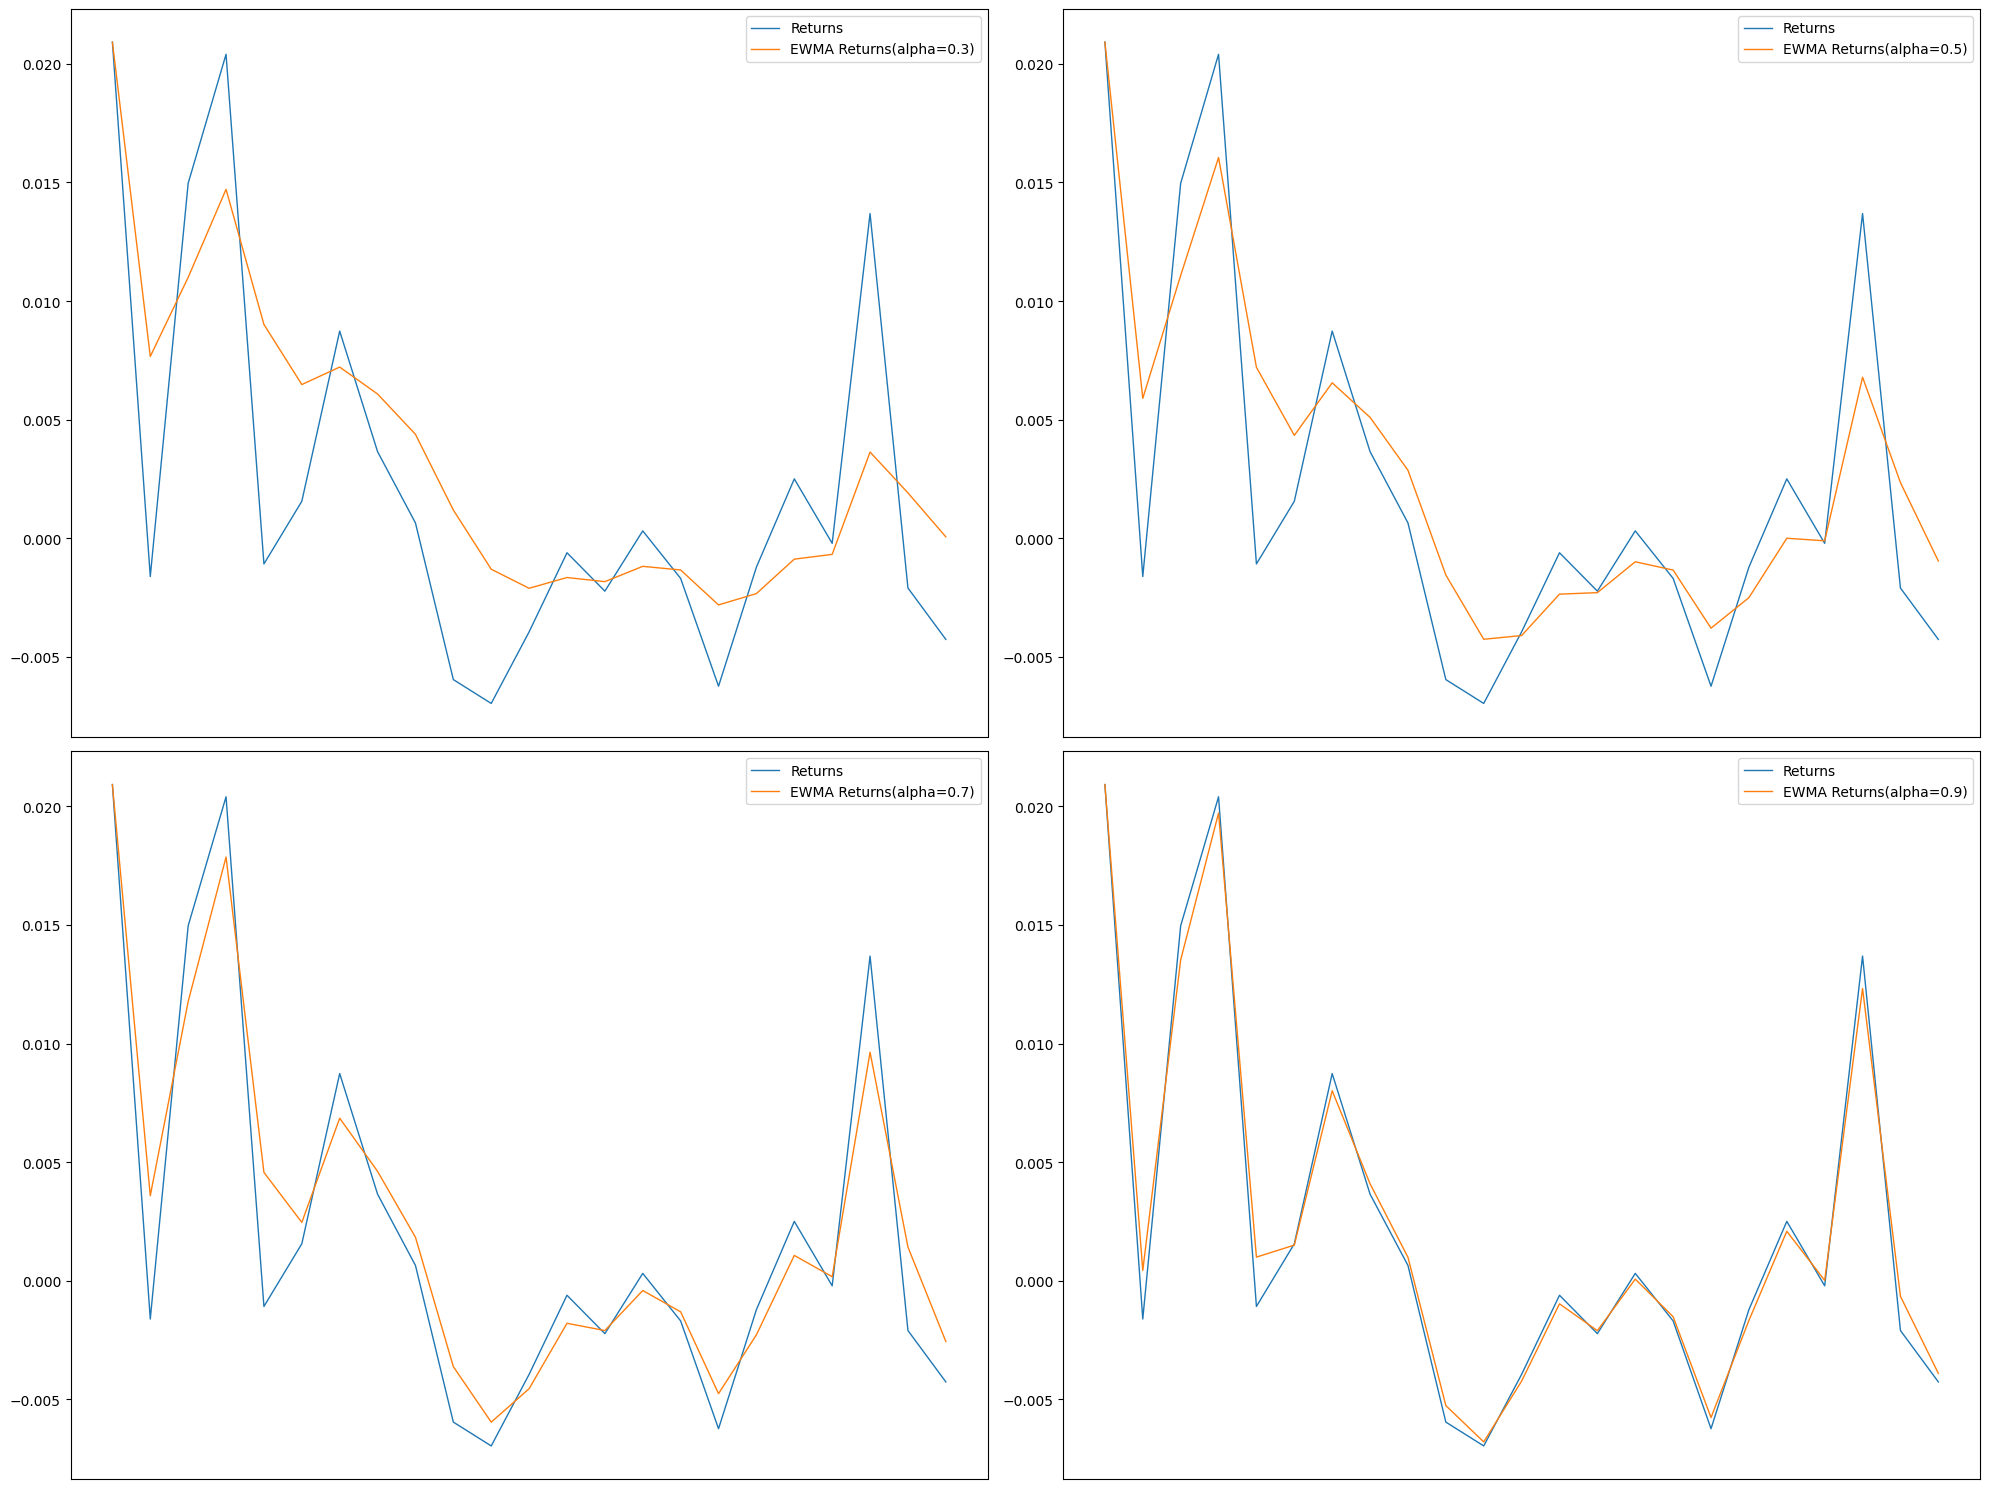

In [139]:
df5_ewmas = process_ewmas(df5,0.3,0.5,0.7,0.9)

### Correlation & Heatmap

In [140]:
df5_ewmas

,original_returns,0.3,0.5,0.7,0.9
ts,,,,,
2022-04-22 01:35:00,0.020914,0.020914,0.020914,0.020914,0.020914
2022-04-22 01:40:00,-0.001612,0.007663,0.005897,0.003586,0.000436
2022-04-22 01:45:00,0.014961,0.010995,0.011076,0.011769,0.013521
2022-04-22 01:50:00,0.020398,0.014708,0.016048,0.017859,0.019711
2022-04-22 01:55:00,-0.001081,0.009014,0.007207,0.004568,0.000998
2022-04-22 02:00:00,0.001560,0.006479,0.004339,0.002461,0.001504
2022-04-22 02:05:00,0.008733,0.007216,0.006553,0.006853,0.008010
2022-04-22 02:10:00,0.003650,0.006081,0.005096,0.004611,0.004086
2022-04-22 02:15:00,0.000647,0.004382,0.002867,0.001836,0.000991


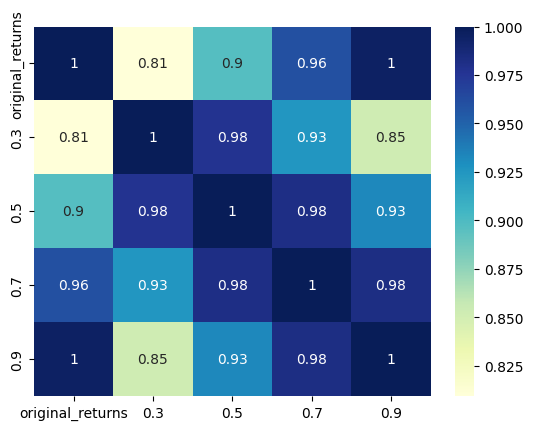

In [141]:
corr5 = df5_ewmas.corr()
sns.heatmap(corr5,cmap='YlGnBu',annot=True);

### Example with Dataframe Resampled for 10 Minutes

In [142]:
path="/media/ege/DATA/bamboo-master/Resamp_10Mins/vwaps/20220422/SSE_600159.csv"
df10 = pd.read_csv(path, index_col='ts')
df10 = df10.drop('Unnamed: 0',axis=1)
df10 = df10.dropna()
df10['returns'] = df10['ltp'].pct_change()
df10

,ltp,trade_size,level_qty:ask:0,level_qty:bid:0,level_price:ask:0,vwap,returns
ts,,,,,,,
2022-04-22 01:30:00,3.190912,46.266830,44120.501836,49220.195838,3.196695,3.190912,NaN
2022-04-22 01:40:00,3.220636,170.056370,53063.878241,58461.984216,3.224945,3.214279,0.009315
2022-04-22 01:50:00,3.305625,425.913219,79827.063572,76205.005045,3.309810,3.274857,0.026389
2022-04-22 02:00:00,3.322773,33.129324,67258.435338,49046.327834,3.327706,3.277207,0.005188
2022-04-22 02:10:00,3.350517,247.678315,79231.450455,71589.755864,3.355299,3.296878,0.008350
2022-04-22 02:20:00,3.320090,1025.912627,77055.715141,53826.271694,3.326487,3.309097,-0.009081
2022-04-22 02:30:00,3.294475,15.345005,62834.757981,51099.433574,3.299351,3.308982,-0.007715
2022-04-22 02:40:00,3.286681,225.123153,29181.773399,70874.322660,3.292580,3.306689,-0.002366
2022-04-22 02:50:00,3.270993,320.623806,31661.935073,58404.455761,3.277874,3.302130,-0.004773


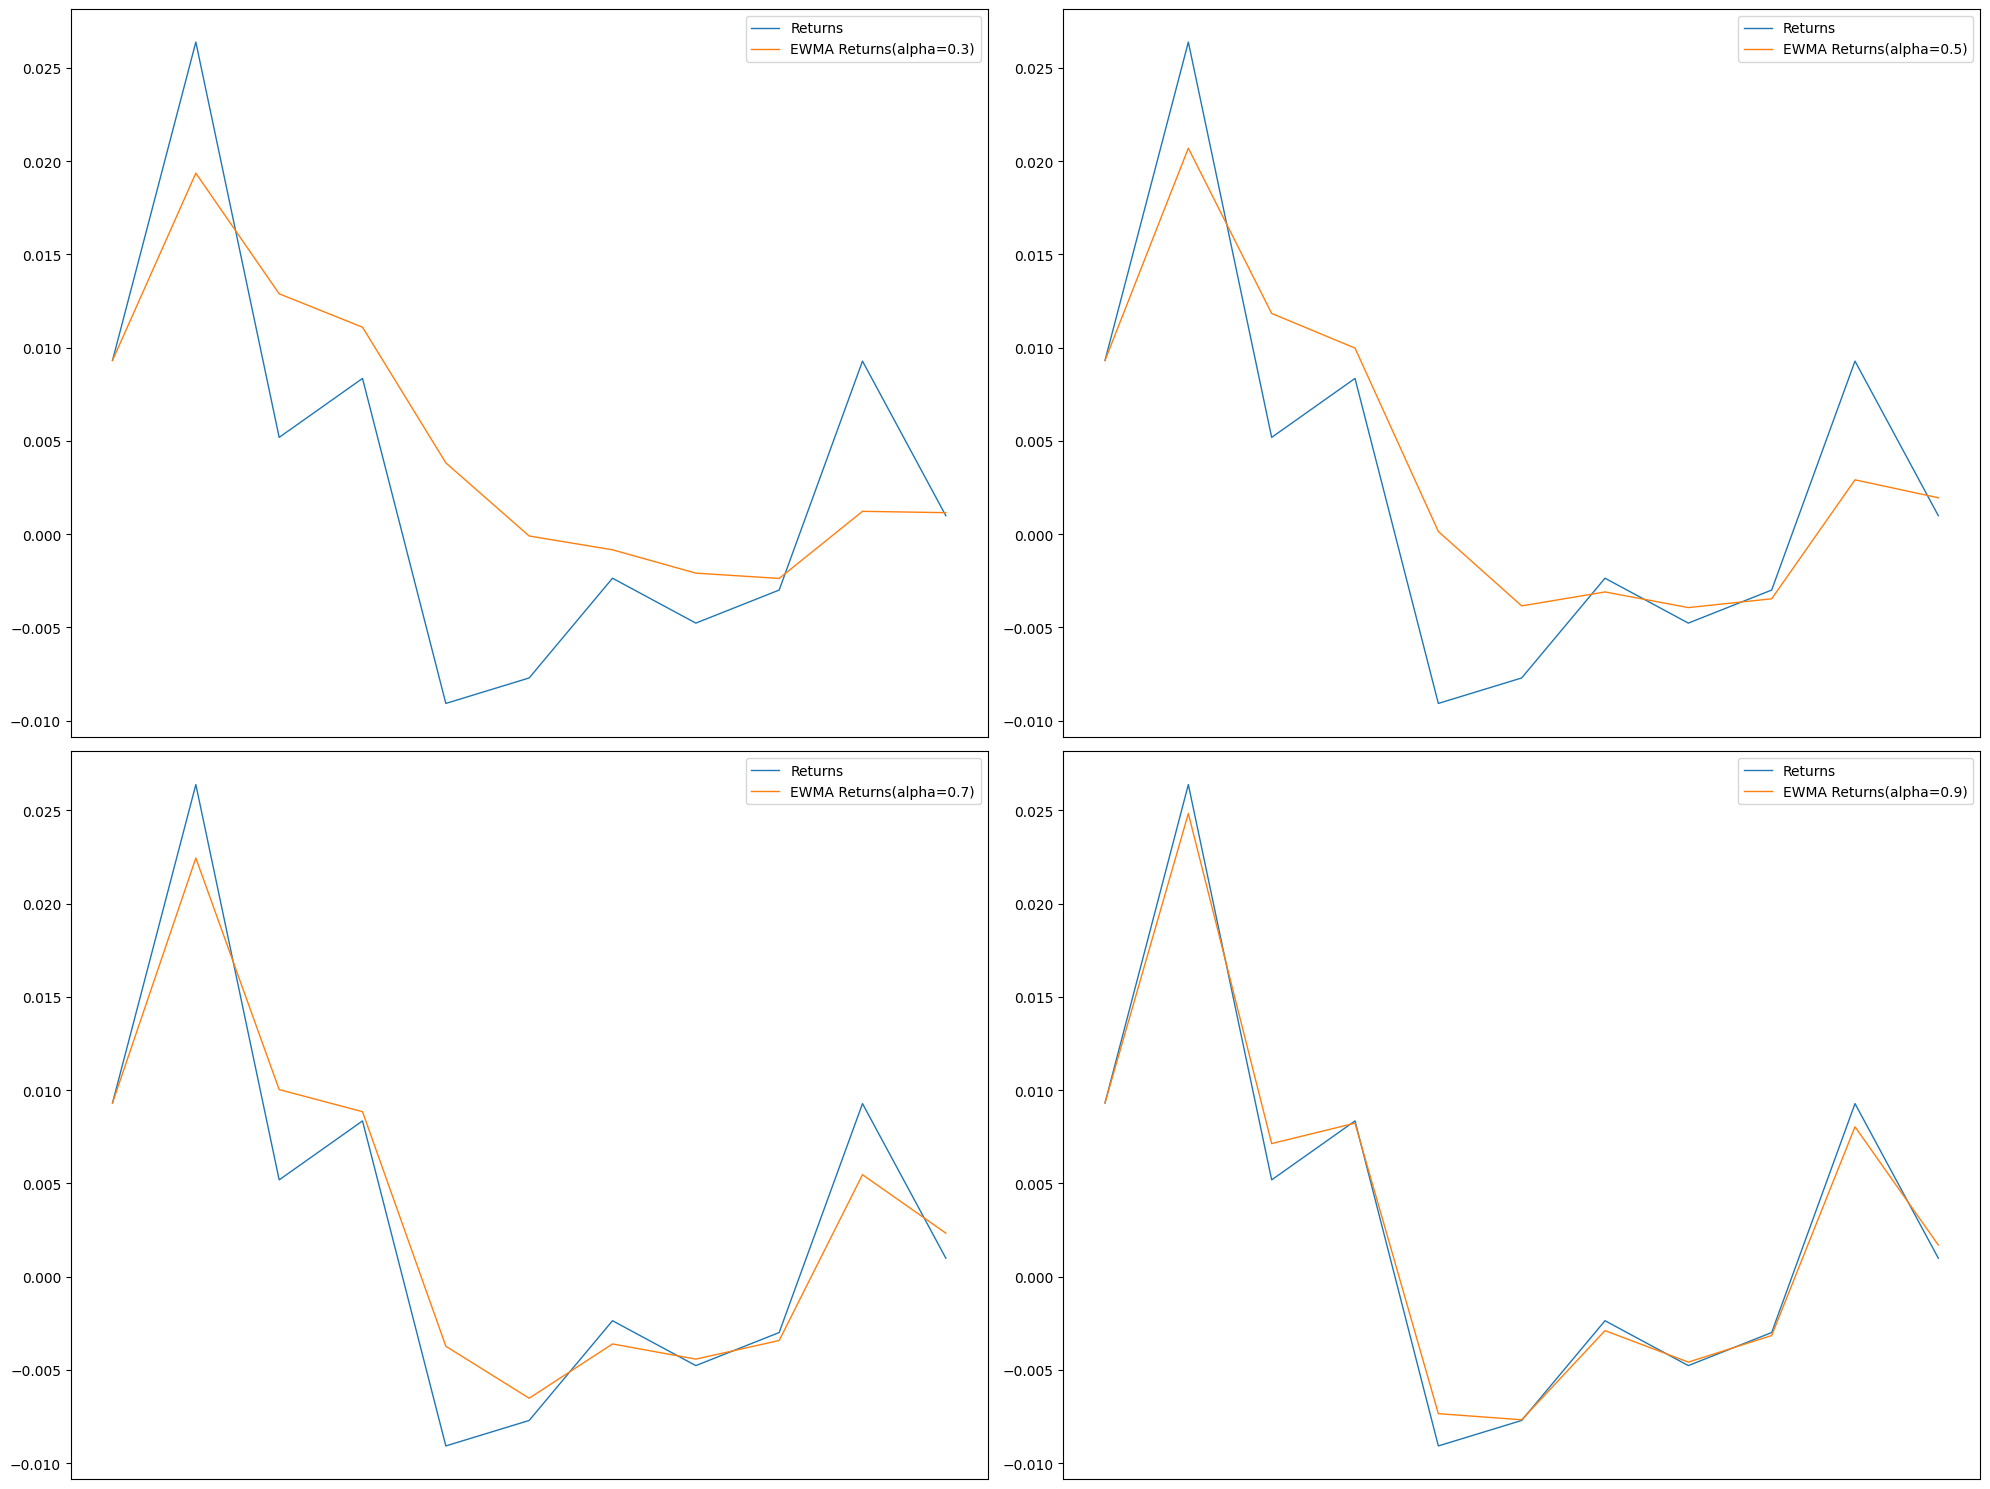

In [143]:
df10_ewmas = process_ewmas(df10,0.3,0.5,0.7,0.9)

### Correlation and Heatmap

In [144]:
df10_ewmas

,original_returns,0.3,0.5,0.7,0.9
ts,,,,,
2022-04-22 01:30:00,NaN,NaN,NaN,NaN,NaN
2022-04-22 01:40:00,0.009315,0.009315,0.009315,0.009315,0.009315
2022-04-22 01:50:00,0.026389,0.019359,0.020698,0.022449,0.024837
2022-04-22 02:00:00,0.005188,0.012888,0.011835,0.010031,0.007135
2022-04-22 02:10:00,0.008350,0.011096,0.009976,0.008844,0.008228
2022-04-22 02:20:00,-0.009081,0.003820,0.000140,-0.003734,-0.007351
2022-04-22 02:30:00,-0.007715,-0.000102,-0.003850,-0.006523,-0.007679
2022-04-22 02:40:00,-0.002366,-0.000842,-0.003102,-0.003612,-0.002897
2022-04-22 02:50:00,-0.004773,-0.002094,-0.003941,-0.004425,-0.004586


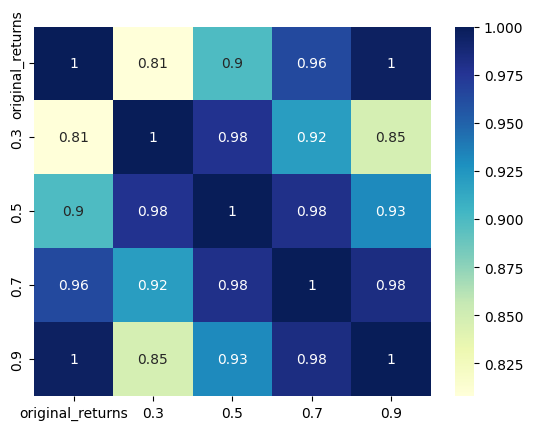

In [145]:
corr10 = df10_ewmas.corr()
sns.heatmap(corr10,cmap='YlGnBu',annot=True);

## Heatmaps of All Shown Together
For better comparison

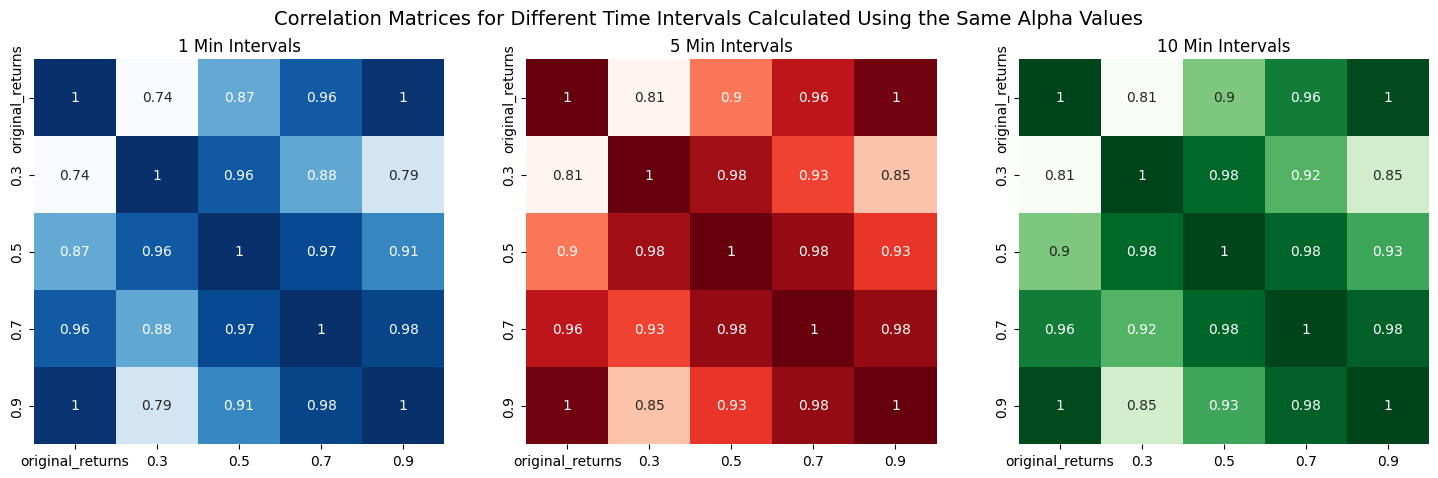

In [146]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.heatmap(corr1, cmap="Blues", annot=True, cbar=False, ax=axs[0])
axs[0].set_title("1 Min Intervals")
sns.heatmap(corr5, cmap="Reds", annot=True, cbar=False, ax=axs[1])
axs[1].set_title("5 Min Intervals")
sns.heatmap(corr10, cmap="Greens", annot=True, cbar=False, ax=axs[2])
axs[2].set_title("10 Min Intervals")

fig.suptitle("Correlation Matrices for Different Time Intervals Calculated Using the Same Alpha Values", fontsize=14)
plt.show()

### Plotting EWMAs with Real Data

Up until this point, we toyed with different $ \alpha $ values. Now it's time to select one and plot with it. 